In [2]:
import json
import os

import fsspec
import pandas as pd

from marin.utils import fsspec_glob

In [3]:
directory = "gs://marin-us-east5/documents/medu-economics-score-llama-70b/fineweb-test-7bdb3a"

files = fsspec_glob(os.path.join(directory, "**/*.json"))

In [4]:
filenames = []
prompts = []
generated_texts = []

for file in files:
    with fsspec.open(file, "r") as f:
        for line in f:
            content = json.loads(line)
            filenames.append(file)
            prompts.append(content.get("prompt", ""))
            generated_texts.append(content.get("generated_text", ""))

In [5]:
df = pd.DataFrame({
    "file": filenames,
    "prompt": prompts,
    "generated_text": generated_texts
})

df

,file,prompt,generated_text
0,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless
1,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,
2,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless
3,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless
4,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless
...,...,...,...
5821,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Poor
5822,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless
5823,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless
5824,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Poor


In [6]:
SCORE_OPTIONS = {
    "Great": 5, "Good": 4, "Okay": 3, "Poor": 2, "Useless": 1
}
def get_score(generated_text):
    for option, score in SCORE_OPTIONS.items():
        if option in generated_text:
            return score
    return -1

df['score'] = df['generated_text'].apply(lambda x: get_score(x))

df

,file,prompt,generated_text,score
0,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
1,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,,-1
2,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
3,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
4,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
...,...,...,...,...
5821,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Poor,2
5822,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
5823,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
5824,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Poor,2


In [7]:
df = df[df['score'] != -1]
df

,file,prompt,generated_text,score
0,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
2,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
3,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
4,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
5,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
...,...,...,...,...
5821,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Poor,2
5822,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
5823,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
5824,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Poor,2


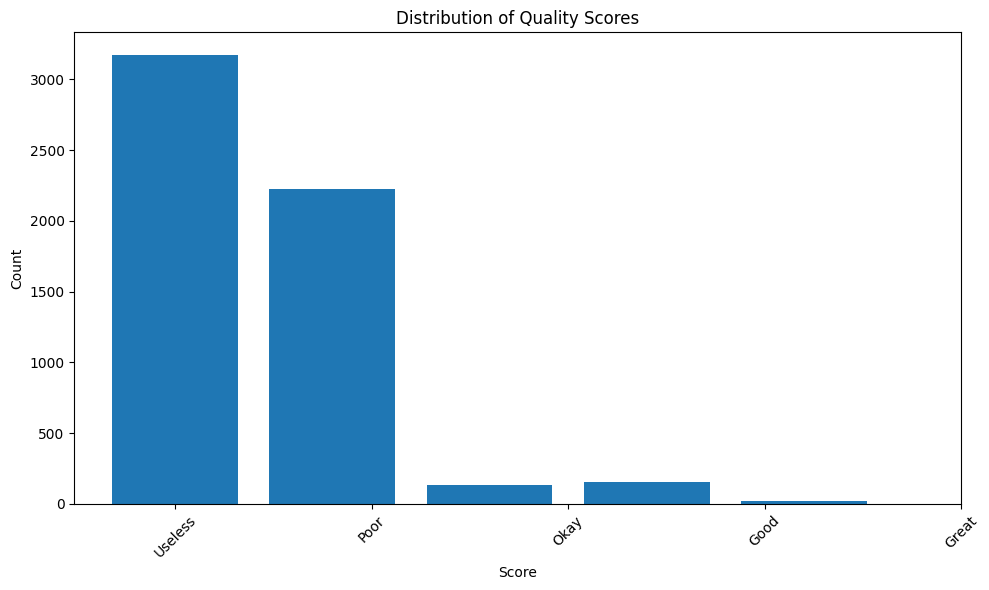

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=len(SCORE_OPTIONS), align='left', rwidth=0.8)
plt.xticks(list(SCORE_OPTIONS.values()), list(SCORE_OPTIONS.keys()), rotation=45)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Quality Scores')
plt.tight_layout()
plt.show()


In [33]:
great_subset = df[df['score'] == 3]
great_subset

,file,prompt,generated_text,score
66,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Okay,3
147,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Okay,3
148,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Okay,3
186,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Okay,3
204,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Okay,3
...,...,...,...,...
5730,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Okay,3
5750,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Okay,3
5753,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Okay,3
5755,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Okay,3


In [43]:
from IPython.display import Markdown

display(Markdown(great_subset['prompt'].iloc[24]))

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

<|eot_id|><|start_header_id|>user<|end_header_id|>

The following document is being considered as training data for a
        Large Language Model.
        Provide a concise description of the document and an assessment of
        the quality of the text or code in the document.
        Key Attributes to Mention
        - Languages contained in the document
        - The coherence of the document
        - The skills the document demonstrates
        - The topics the document contains facts and information about
        Document:
        '''
        Applicable Mathematics/Odds

"Odds" is a way of expressing the likelihood of an event.
The more usual way of expressing the likelihood of an event is its "probability" (the percentage of future trials which are expected to produce the event: so in tossing a coin believed to be fair, we would assign a probability of 50% (or one half, or 0.5) to the event "heads").
The ODDS of an event, however, is the ratio of the probability of the event happening to the probability of the even not happening (i.e. the ODDS of a fair coin landing heads is 50%:50% = 1:1 = 1). It is the ODDS we are using when we use a phrase like "it is 50/50 whether I get the job" or "The chances of our team winning are 2 to 1".
Or, For example, when rolling a fair die, there is one chance that you will roll a 1 and five chances that you will not. The odds of rolling a 1 are 1:5, or 1 to 5. This can also be expressed as formula_1 or 0.2 or 20%, but these forms are likely to be misunderstood as normal probabilities rather than odds.
To convert odds to probability, you add the two parts, and this is the denominator of the fraction of your probability. The first part becomes the numerator. Thus, 1:5 becomes 1/(1+5) or 1/6.
To convert probability to odds, you use the numerator as the first number, then subtract the numerator from the denominator and use it as the second number. Thus, 1/6 becomes 1:(6-1) or 1:5.
See also.
The more usual way of expressing the likelihood of an event is its "probability" (the percentage of future trials which are expected to produce the event: so in tossing a coin believed to be fair, we would assign a probability of 50% (or one half, or 0.5) to the event "heads").
The ODDS of an event, however, is the ratio of the probability of the event happening to the probability of the event not happening (i.e. the ODDS of a fair coin landing heads is 50%:50% = 1:1 = 1). It is the ODDS we are using when we use a phrase like "it is 50/50 whether I get the job" or "The chances of our team winning are 2 to 1".
Or, For example, when rolling a fair die, there is one chance that you will roll a 1 and five chances that you will not. The odds of rolling a 1 are 1:5, or 1 to 5. This can also be expressed as 1 / 5 or 0.2 or 20%, but these forms are likely to be misunderstood as normal probabilities rather than odds.
To convert odds to probability, you add the two parts, and this is the denominator of the fraction of your probability. The first part becomes the numerator. Thus, 1:5 becomes 1/(1+5) or 1/6.
To convert probability to odds, you use the numerator as the first number, then subtract the numerator from the denominator and use it as the second number. Thus, 1/6 becomes 1:(6-1) or 1:5.
        '''
        Based on your previous reasoning, give me a concrete decision
        about the utility of the document as training data for the
        following benchmark. If a benchmark is Multilingual, you
        should assume a high-degree of importance is placed on highquality content in languages other than English.
        
## Test Type
This test appears to be a comprehensive assessment of economic knowledge, covering microeconomic and macroeconomic concepts, as well as statistical analysis and modeling, likely from an advanced academic or professional setting, such as a college-level economics course or a certification exam for economists.

## Required Languages, Skills, and Knowledge
The language model would need to understand economic terminology, concepts, and theories, including market structures, government intervention, and industry characteristics. It should possess strong problem-solving skills, with the ability to apply economic and statistical concepts to real-world scenarios, and be proficient in English, including grammar, syntax, and vocabulary related to economics and statistics. Additionally, it should be familiar with statistical analysis, including regression, hypothesis testing, and time series modeling.

## Ideal Training Data
The ideal training data for this evaluation would consist of a diverse and comprehensive corpus of texts, including economics and statistics textbooks, academic articles, research papers, practice problems, exams, and study guides. It should also include news articles, online resources, and policy documents discussing economic issues and trends, as well as diverse data sets, such as economic indicators, financial data, and statistical models, to help the model generalize its knowledge and apply it to different scenarios.

        Output your decision about the utility of the data as one of the
        following single words Great/Good/Okay/Poor/Useless without
        formatting.==<|eot_id|><|start_header_id|>assistant<|end_header_id|>

